In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import random
random.seed(0)

In [4]:
# read dataset

In [5]:
df = pd.read_csv("boston.csv")
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
# check shape, observe row:col ratio
df.shape

(506, 14)

In [8]:
# dtypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
# CHAS could have been a category
df.CHAS = df.CHAS.astype("object")

In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS        object
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# check for missing values and outliers

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
# calculate Q1, Q3 and IQR to filter out outliers
df_num = df.select_dtypes("number")

In [14]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
UT = Q3 + 1.5*IQR
LT = Q1 - 1.5*IQR
df_trim = df[~((df_num > UT) | (df_num < LT)).any(axis='columns')]

In [15]:
y = df_trim.MEDV

In [16]:
df_features = df_trim.iloc[:,:-1]
df_X_num = df_features.select_dtypes("number")
df_X_cat = df_features.select_dtypes("object")

In [17]:
df_X_num.shape, df_X_cat.shape

((288, 12), (288, 1))

In [18]:
# descriptive statistics, plots

### univariate analysis
### bivariate analysis
### multivariate analysis

In [19]:
# rescaling of numeric columns
df_X_num_rescaled = (df_X_num - df_X_num.mean())/df_X_num.std(ddof=1)

In [20]:
# encoding of category columns
df_X_cat.CHAS.value_counts()
# there is only one column, two class and it is encoded already 

CHAS
0    268
1     20
Name: count, dtype: int64

In [21]:
# merging of the num and category columns
df_X_concat = pd.concat([df_X_num,df_X_cat],axis='columns')

In [22]:
X = df_X_concat
# y = df_trim['MEDV'] # already has this

In [23]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((201, 13), (87, 13), (201,), (87,))

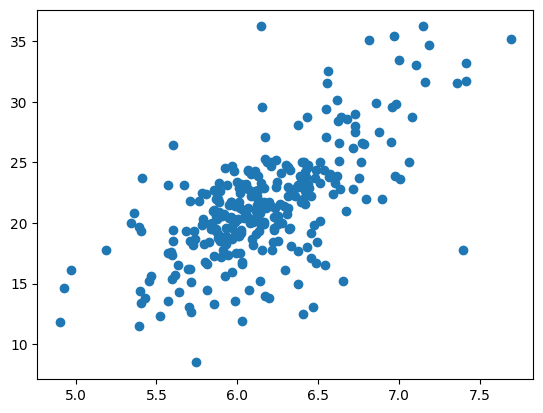

In [25]:
plt.scatter(X.RM,y);

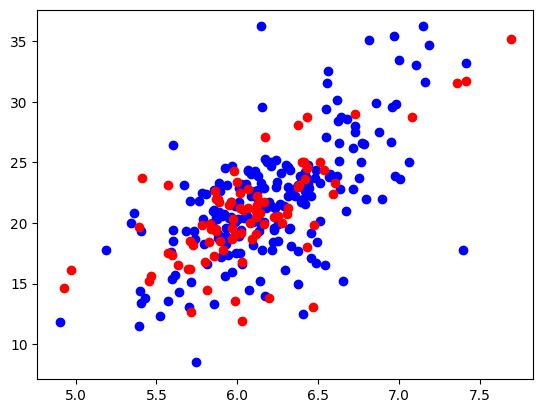

In [26]:
# visualizing split
plt.scatter(X_train.RM,y_train,c='b');
plt.scatter(X_test.RM,y_test,c = 'r');
plt.show()

# SLR model: fit a model with only one feature

In [27]:
lm = LinearRegression()
model = lm.fit(X_train[['RM']],y_train)

In [28]:
model.intercept_, model.coef_

(-22.92656744593298, array([7.20572292]))

In [29]:
# display first ten values of the predicted values
yhat_train = model.predict(X_train[['RM']])

In [30]:
yhat_train_calc = model.intercept_ + model.coef_ * X_train['RM']

In [31]:
yhat_train[0:5], yhat_train_calc[0:5]

(array([19.5007291 , 21.11481103, 23.15403062, 21.22289688, 23.11079628]),
 216    19.500729
 359    21.114811
 357    23.154031
 358    21.222897
 84     23.110796
 Name: RM, dtype: float64)

In [32]:
# get R Square from the model
model.score(X_train[['RM']],y_train)

0.40708950342428096

In [33]:
# calculate R Square from scratch

SST = sum((y_train - np.mean(y_train))**2)
SSE = sum((y_train - yhat_train)**2)
SSR = sum((yhat_train - np.mean(y_train))**2)

In [34]:
SSE + SSR, SST

(4756.760000000002, 4756.760000000002)

In [35]:
model_slr_r_square = SSR/SST

In [36]:
# predict y_test using the model
yhat_test = model.predict(X_test[['RM']])

In [37]:
# compute MSE on train and test
model_slr_MSE_train = np.mean((y_train - yhat_train)**2)
model_slr_MSE_test = np.mean((y_test - yhat_test)**2)
model_slr_MSE_train, model_slr_MSE_test

(14.03150713279362, 8.959224363187621)

In [38]:
# compute MAPE on train and test
model_slr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_slr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)

In [39]:
model_slr_performance = {'model':"model_slr",'R Sq':model_slr_r_square,'train_MSE':model_slr_MSE_train,'test_MSE':model_slr_MSE_test,'train_MAPE':model_slr_MAPE_train,'test_MAPE':model_slr_MAPE_test}

In [40]:
df_snapshot = pd.DataFrame(columns=['model','R Sq','train_MSE','test_MSE','train_MAPE','test_MAPE'])
df_snapshot

,model,R Sq,train_MSE,test_MSE,train_MAPE,test_MAPE


In [41]:
model_slr_performance

{'model': 'model_slr',
 'R Sq': 0.4070895034242811,
 'train_MSE': 14.03150713279362,
 'test_MSE': 8.959224363187621,
 'train_MAPE': 13.989402066084063,
 'test_MAPE': 11.373900238129833}

In [42]:
df_snapshot = df_snapshot.append(model_slr_performance,ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df_snapshot

# visualize the model

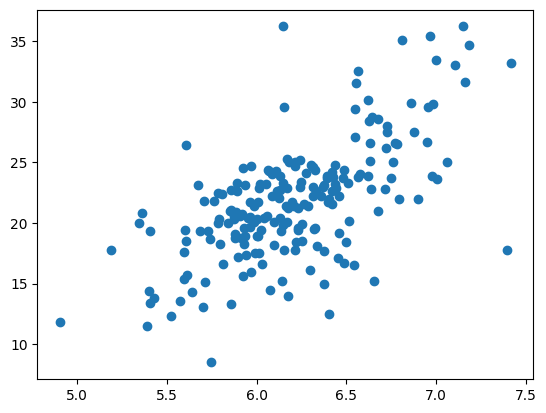

In [43]:
# plot the train data points, shows positive correlation between feature and label

plt.scatter(X_train.RM,y_train);

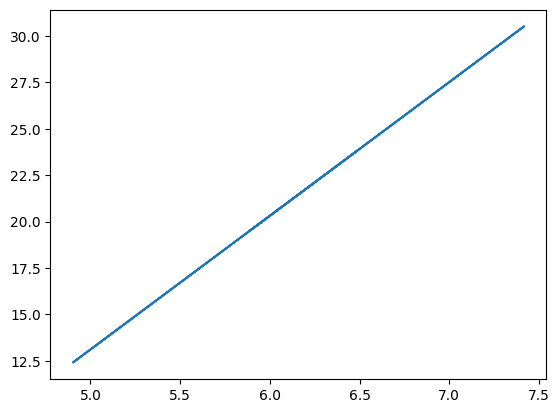

In [44]:
# plot the line
plt.plot(X_train.RM,yhat_train)

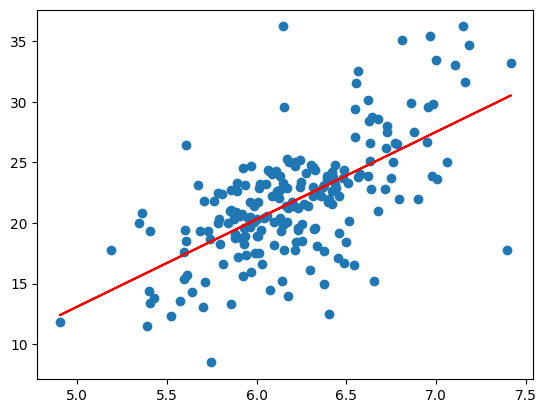

In [45]:
# combine them
plt.scatter(X_train.RM,y_train);
plt.plot(X_train.RM,yhat_train,'r');
plt.show()

In [ ]:
# how well is the line explaining test data
plt.scatter(X_test.RM,y_test);
plt.plot(X_train.RM,yhat_train,'r');
plt.show()

### correlation and R Square

if r is the correlation between the feature and the label then R Square = r**2

greater the correlation between feature and label, better is the fit of the linear model

this property applies directly only in SLR. 

In MLR also, correlation improves R Square but this simple formula does not apply.

In [46]:
np.corrcoef(X_train.RM,y_train)

array([[1.        , 0.63803566],
       [0.63803566, 1.        ]])

In [47]:
np.sqrt(model_slr_r_square)

0.6380356599942366

# Multiple Linear Model
Linear regression model which uses two or more features

In [48]:
lm = LinearRegression()
model_mlr = lm.fit(X_train[['LSTAT','RM']],y_train)

In [49]:
model_mlr.score(X_train[['LSTAT','RM']],y_train)

0.5770177445483218

In [50]:
model_mlr.intercept_, model_mlr.coef_

(7.057671848119089, array([-0.48995599,  3.31148647]))

In [51]:
yhat_train = model_mlr.predict(X_train[['LSTAT','RM']])

In [52]:
yhat_train_calc = model_mlr.intercept_ + model_mlr.coef_[0] * X_train['LSTAT'] + model_mlr.coef_[1] * X_train['RM']

In [53]:
yhat_train[0:5], yhat_train_calc[0:5]

(array([19.93639881, 21.08973481, 21.73291189, 21.72245474, 23.50138233]),
 216    19.936399
 359    21.089735
 357    21.732912
 358    21.722455
 84     23.501382
 dtype: float64)

In [54]:
# calculate R Square from scratch

SST = sum((y_train - np.mean(y_train))**2)
SSE = sum((y_train - yhat_train)**2)
SSR = sum((yhat_train - np.mean(y_train))**2)

In [55]:
SSE + SSR, SST

(4756.760000000001, 4756.760000000002)

In [56]:
model_mlr_r_square = SSR/SST

In [57]:
# predict y_test using the model
yhat_test = model_mlr.predict(X_test[['LSTAT','RM']])

In [58]:
# compute MSE on train and test
model_mlr_MSE_train = np.mean((y_train - yhat_train)**2)
model_mlr_MSE_test = np.mean((y_test - yhat_test)**2)
model_mlr_MSE_train, model_mlr_MSE_test

(10.010074992250374, 11.434694409497057)

In [59]:
# compute MAPE on train and test
model_mlr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_mlr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)

In [60]:
model_mlr_performance = {'model':"model_mlr",'R Sq':model_mlr_r_square,'train_MSE':model_mlr_MSE_train,'test_MSE':model_mlr_MSE_test,'train_MAPE':model_mlr_MAPE_train,'test_MAPE':model_mlr_MAPE_test}

In [ ]:
df_snapshot = df_snapshot.append(model_mlr_performance, ignore_index=True)
df_snapshot

In [61]:
import statsmodels.api as sm

In [63]:
Xrm_train = X_train[['RM']]
Xrm_test = X_test[['RM']]

In [70]:
Xrm_train = sm.add_constant(Xrm_train)

In [71]:
Xrm_train.head()

,const,RM
216,1.0,5.888
359,1.0,6.112
357,1.0,6.395
358,1.0,6.127
84,1.0,6.389


In [72]:
sm_model = sm.OLS(y_train,Xrm_train)
results = sm_model.fit()

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     136.6
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           2.27e-24
Time:                        16:31:54   Log-Likelihood:                -550.66
No. Observations:                 201   AIC:                             1105.
Df Residuals:                     199   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.9266      3.836     -5.977      0.000     -30.490     -15.363
RM             7.2057      0.616     11.689      0.000       5.990       8.421
==============================================================================
Omnibus:                        9.424   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               19.347
Skew:                          -0.048   Prob(JB):                     6.29e-05
Kurtosis:                       4.517   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],
      dtype='object')

In [78]:
Xrm_train = X_train[['RM','AGE','PTRATIO']]
Xrm_test = X_test[['RM','AGE','PTRATIO']]
Xrm_train = sm.add_constant(Xrm_train)
sm_model = sm.OLS(y_train,Xrm_train)
results = sm_model.fit()

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     96.74
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.60e-38
Time:                        16:43:55   Log-Likelihood:                -512.19
No. Observations:                 201   AIC:                             1032.
Df Residuals:                     197   BIC:                             1046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5234      4.031     -0.874      0.383     -11.473       4.426
RM             6.5588      0.519     12.649      0.000       5.536       7.581
AGE           -0.0609      0.008     -7.230      0.000      -0.078      -0.044
PTRATIO       -0.6058      0.129     -4.711      0.000      -0.859      -0.352
==============================================================================
Omnibus:                       25.820   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.628
Skew:                           0.478   Prob(JB):                     3.78e-17
Kurtosis:                       5.849   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""